1. Charger le fichier

   1.1 Importer les livrairies


In [542]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM    
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam

# Importer les données

    1.2 Lire le DataFrame


In [543]:
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")

df.head()

C:\Users\harro\AppData\Local\Temp\ipykernel_31952\760555468.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")


MemoryError: Unable to allocate 242. MiB for an array with shape (99, 320772) and data type float64

    1.3 Prendre connaissance du DataFrame


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [ ]:
df.isnull()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
320768,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
320769,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
320770,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.isna()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
320768,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
320769,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
320770,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True


<Axes: >

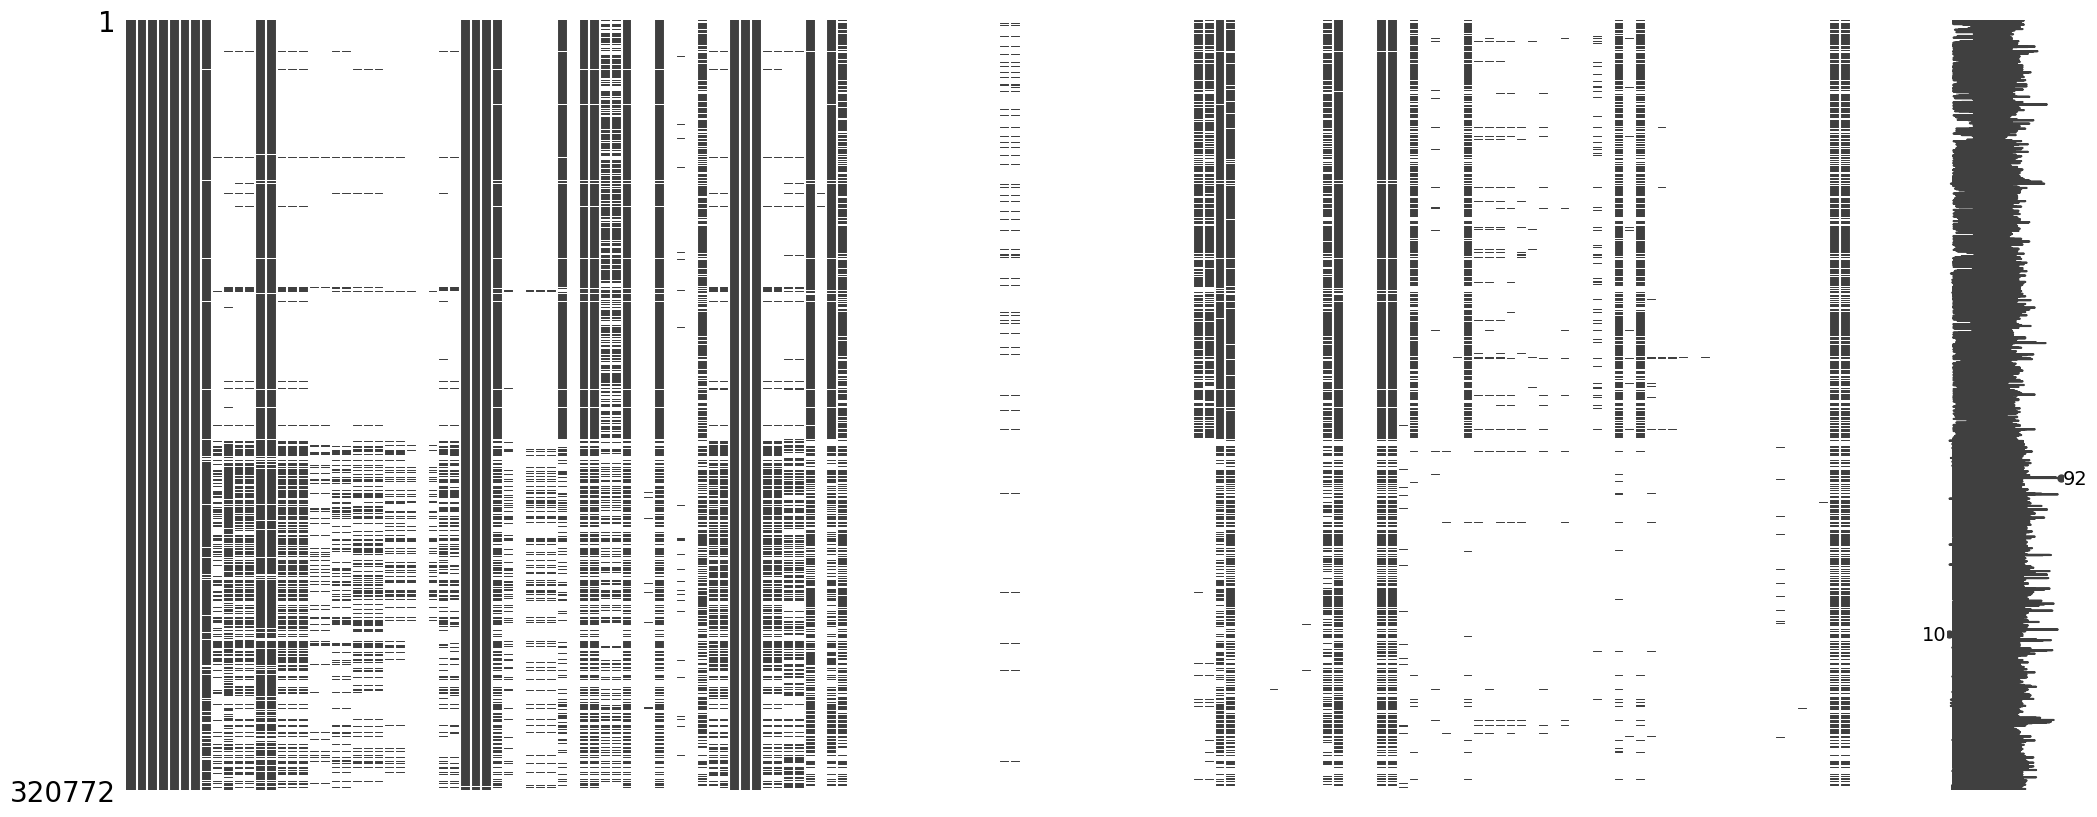

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
#Prise en compte des données de la base de données 

In [ ]:
df.shape

(320772, 162)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


<!-- ############ Suppression des colonnes -->


<!-- Suppression de Certaines colonnes -->


In [ ]:
# Afficher la liste de toutes les colonnes
print(df.columns.tolist())

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [ ]:
colonnes_a_garder = [
    'code',
    'product_name',
    'countries',
    'nutrition_grade_fr',
    'energy_100g',
    'sugars_100g',
    'nutrition-score-fr_100g',
    'saturated-fat_100g',
    'sodium_100g',
    'salt_100g',
    'additives',
    'additives_tags',
    'fiber_100g',
    'additives_fr',
    


]

df = df[colonnes_a_garder].copy()


In [ ]:
df.head()

,code,product_name,countries,nutrition_grade_fr,energy_100g,sugars_100g,nutrition-score-fr_100g,saturated-fat_100g,sodium_100g,salt_100g,additives,additives_tags,fiber_100g,additives_fr
0,3087,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),US,d,2243.0,14.29,14.0,28.57,0.000,0.00000,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,3.6,NaN
2,4559,Peanuts,US,b,1941.0,17.86,0.0,0.00,0.250,0.63500,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,7.1,NaN
3,16087,Organic Salted Nut Mix,US,d,2540.0,3.57,12.0,5.36,0.482,1.22428,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,7.1,NaN
4,16094,Organic Polenta,US,NaN,1552.0,NaN,NaN,NaN,NaN,NaN,[ organic-polenta -> en:organic-polenta ] [...,NaN,5.7,NaN


In [ ]:
# Renommer les colonnes en français
df.rename(columns={
    "code": "code",
    "product_name": "nom_produit",
    "countries": "pays",
    "nutrition_grade_fr": "note_nutritionnelle",
    "energy_100g": "energie_100g",
    "sugars_100g": "sucres_100g",
    "nutrition-score-fr_100g": "score_nutritionnel_100g",
    "saturated-fat_100g": "graisses_saturees_100g",
    "sodium_100g": "sodium_100g",
    "salt_100g": "sel_100g",
    "additives": "additifs",
    "additives_tags": "tags_additifs",
    "fiber_100g": "fibres_100g",
    "additives_fr": "additifs_fr"
}, inplace=True)

# Vérifier les nouvelles colonnes
print(df.columns)

Index(['code', 'nom_produit', 'pays', 'note_nutritionnelle', 'energie_100g',
       'sucres_100g', 'score_nutritionnel_100g', 'graisses_saturees_100g',
       'sodium_100g', 'sel_100g', 'additifs', 'tags_additifs', 'fibres_100g',
       'additifs_fr'],
      dtype='object')


<Axes: >

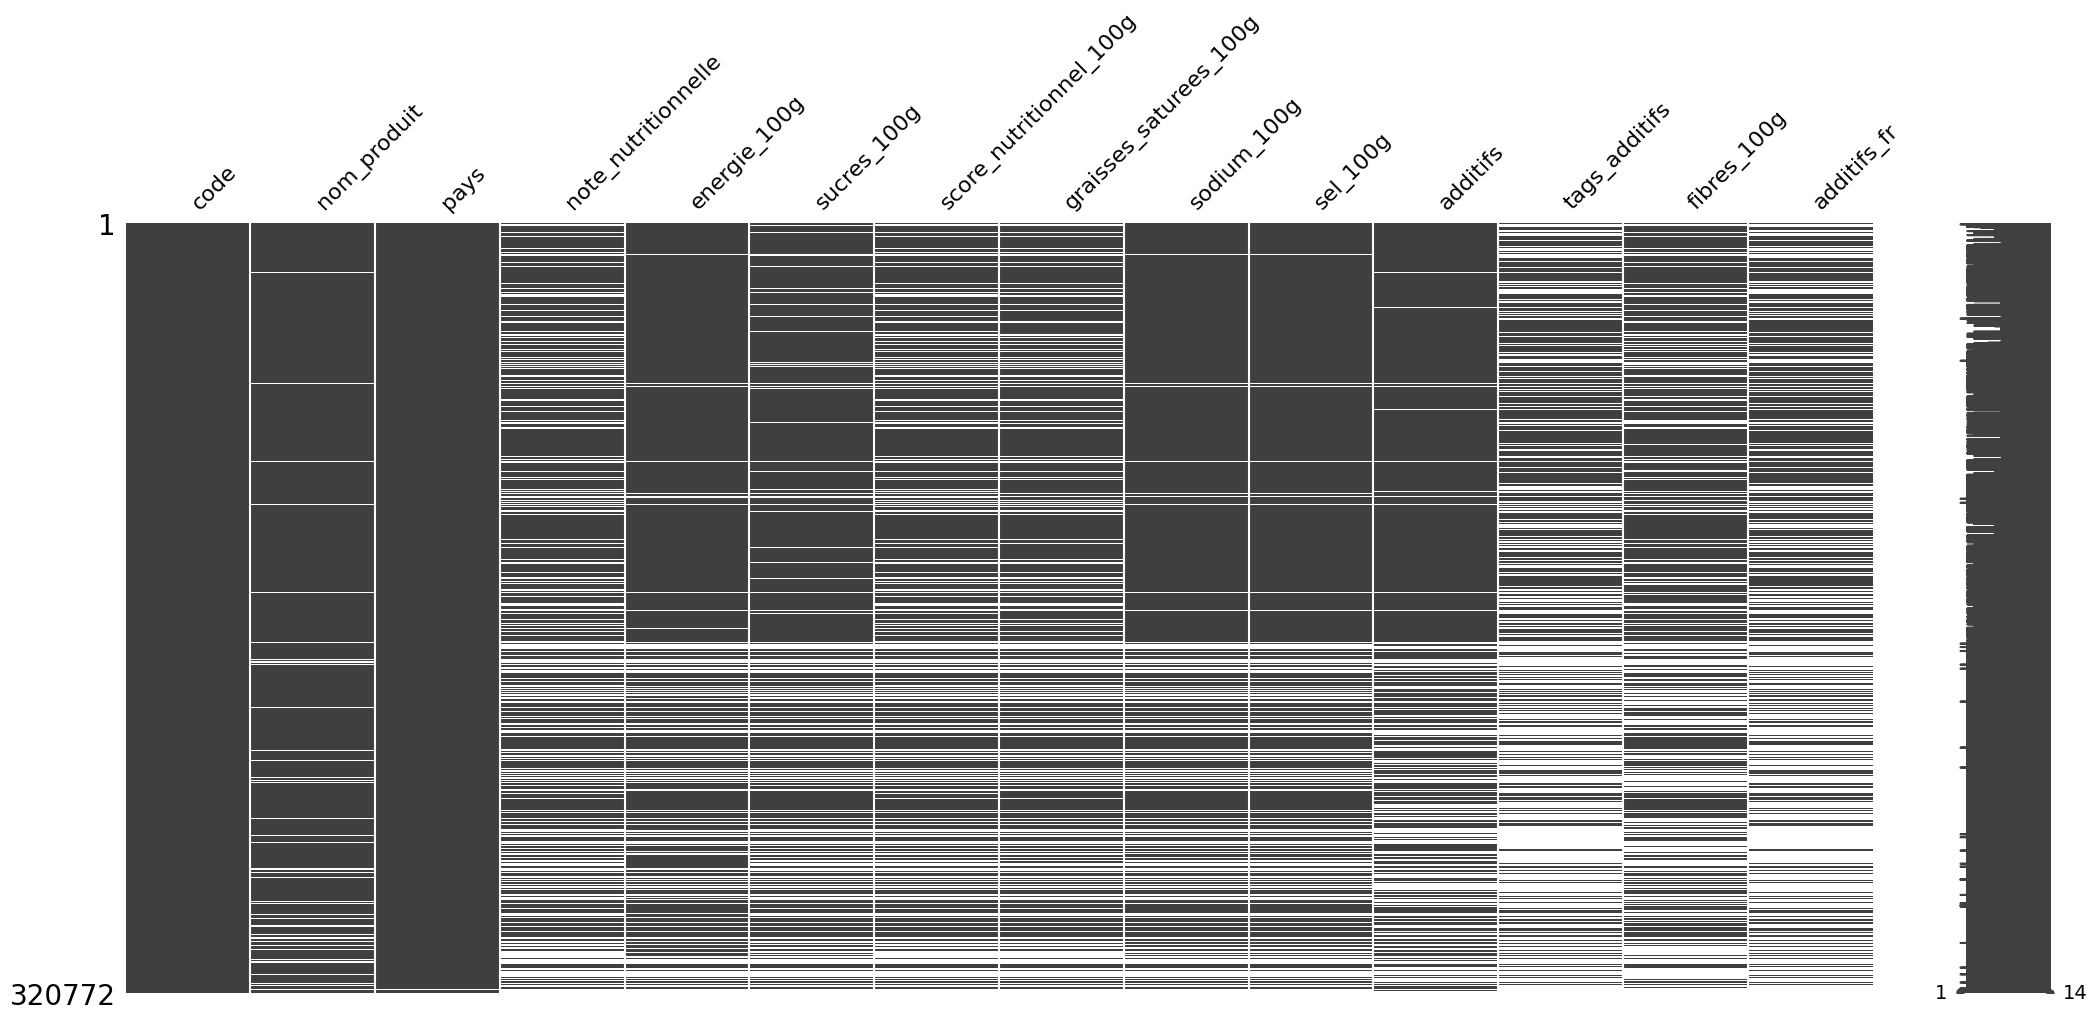

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
df.columns
df["pays"]

0         en:FR
1            US
2            US
3            US
4            US
          ...  
320767    en:RO
320768       US
320769    China
320770    en:FR
320771       US
Name: pays, Length: 320772, dtype: object

In [ ]:
# Liste des valeurs à remplacer
valeurs_a_remplacer = [
    "france",
    "en:france",
    "França",
    "Frankreich",
    "Francia",
    "France",
    "Franciaország",
    "Frankrijk",
    "en:french-polynesia",
    "France,United Kingdom",
    "France, Suisse",
    "France,États-Unis",
    "France,Belgique,Royaume-Uni,Pays-Bas",
    "France,Royaume-Uni",
    "France,Saint Pierre and Miquelon",
    "Belgique,France,États-Unis",
    "France,Belgium",
    "Dinamarca,França,Itália,Países Baixos,Polónia,Portugal,Espanha",
    "Frankreich,Deutschland",
    "France,Allemagne,Espagne",
    "France,Portugal",
    "France,Portugal,Espagne",
    "France,Germany",
    "Francia,España",
    "Pays-Bas,France",
    "Belgique,France",
    "France, en:denmark, en:switzerland, en:belgium",
    "France, en:belgium, en:switzerland, en:reunion",
    "Belgique,France,Polynésie française,Martinique,Suisse",
    "Austria,France,Germany,Italy,Netherlands,Switzerland",
    "Saint-Pierre-et-Miquelon",
    "Dánia,Franciaország,Portugália,Spanyolország,Nagy-Britannia,Magyarország, en:switzerland",
    "Dánia,Franciaország,Németország,Portugália,Spanyolország,Nagy-Britannia,Magyarország, en:switzerland, en:belgium",
    "Frankreich,Deutschland,Mauritius,Espagne,Royaume-Uni",
    "France,Suisse",
    "France, en:reunion",
    "France,Switzerland",
    "La Réunion",
    "Frankrijk",
    "Belgique,France,Suisse",
    "España, en:france",
    "France, en:switzerland",
    "France, en:belgium",
    "France, en:belgium, Suisse",
    "Guyane",
    "Belgique, en:france",
    "Francia, España",
    "France, en:switzerland, en:belgium",
    "Guyane, France",
    "France,Spain",
    "France,Guadeloupe",
    "La Réunion, France",
    "France,La Réunion",
    "France,Belgique,Pays-Bas,Royaume-Uni",
    "Belgium,France",
    "France,Belgique",
    "France, en:denmark",
    "France,Espagne, en:french-polynesia",
    "France,Russie, Suisse",
    "Belgium, en:france",
    "France,Serbie",
    "France,belgique",
    "Belgique,France,Luxembourg",
    "Belgique,France,Maroc,Suisse",
    "Belgium,Denmark,France,Poland",
    "France,Guadeloupe,Suisse",
    "Danemark,France,Suisse,Royaume-Uni",
    "Suisse, en:france",
    "France,Andorre",
    "France, en:belgium",
    "Belgium,France,Netherlands",
    "Deutschland, en:france",
    "Belgique,France, Suisse",
    "France, US",
    "Brésil,France",
    "Algérie,France",
    "Francia,Portugal,España",
    "França,Portugal,Espanha",
    "Guadeloupe",
    "France,Pays-Bas",
    "UK,France",
    "United States, en:france",
    "France,Allemagne",
    "France,Espagne",
    "France, en:belgium, en:switzerland, en:morocco",
    'en:HK, en:france'
]
remplacements = {
    "Austria,Germany": "Australia", 
    "Australia,United Kingdom,United States": "Australia",
    "Australia,Malaysia": "Australia",
}
valeurs_a_modifier = ["United Kingdom, Suisse", "Suisse"]
valeurs_a_changer = [
    "Deutschland",
    "Germany,Portugal,Spain",
    "Germany,Spain",
    "Deutschland,Schweiz",
    "Deutschland,Vereinigtes Königreich",
]
valeurs_a_alterner = [
    "España",
    "España,Reino Unido",
    "Espagne",
    "España,Suiza",
    "Portugal,Espanha",
]
# df["pays"] = df["pays"].replace("Belgique", "Belgium")
df["pays"] = df["pays"].replace("România", "Romanie")
df["pays"] = df["pays"].replace("Italy", "Italie")
df["pays"] = df["pays"].replace("Hungry", "Hongrie")
df["pays"] = df["pays"].replace("Netherlands", "Hollande")


# Remplacer les valeurs dans la colonne 'pays'

df["pays"] = df["pays"].replace(valeurs_a_remplacer, "France")
df["pays"] = df["pays"].replace(valeurs_a_changer, "Allemagne")
df["pays"] = df["pays"].replace(valeurs_a_modifier, "Suisse")
df["pays"] = df["pays"].replace(valeurs_a_alterner, "Espagne")
df["pays"] = df["pays"].replace(remplacements)
df["pays"].unique()

array(['en:FR', 'US', 'France', ..., 'Malaysia', 'Malaisie',
       'Hong Kong,China'], dtype=object)

In [ ]:
df.shape

(320772, 14)

In [ ]:
df[df["pays"].isnull()]

,code,nom_produit,pays,note_nutritionnelle,energie_100g,sucres_100g,score_nutritionnel_100g,graisses_saturees_100g,sodium_100g,sel_100g,additifs,tags_additifs,fibres_100g,additifs_fr
556,30908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10626,13000001243,Ketchup Heinze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12973,16000122505,Traditional Chex Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14313,18627740001,Go Lean Cereals,NaN,a,1130.0,11.5,-4.0,0.0,0.163,0.415,[ soy-grits -> en:soy-grits ] [ grits -> en...,en:e170,19.2,E170 - Carbonate de calcium
25068,30000015520,Instant Oatmeal Regular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320240,9346321000055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320276,935,poire montpelliéraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ poire -> fr:poire ],NaN,NaN,NaN
320346,9400556004957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320526,9550645107219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["pays"] = df["pays"].fillna("France")
df["pays"].unique()

array(['en:FR', 'US', 'France', ..., 'Malaysia', 'Malaisie',
       'Hong Kong,China'], dtype=object)

In [ ]:
# Liste des pays à conserver
pays_a_conserver = [
    "Belgique",
    "Allemagne",
    "Hongrie",
    "Italie",
    "France",
    "Hollande",
    "Portugal",
    "Romanie",
    "Espagne",
]

# Sélectionner les index des lignes à supprimer (celles qui ne sont pas dans la liste)
# index_a_supprimer = df[~df["countries"].isin(pays_a_conserver)].index

# Supprimer les lignes du DataFrame
# df.drop(index_a_supprimer, inplace=True)

# Afficher les valeurs uniques de la colonne 'countries'
# df["countries"].unique()
df = df[df['pays'].isin(pays_a_conserver)].copy()
df.head()

,code,nom_produit,pays,note_nutritionnelle,energie_100g,sucres_100g,score_nutritionnel_100g,graisses_saturees_100g,sodium_100g,sel_100g,additifs,tags_additifs,fibres_100g,additifs_fr
46,24600,Filet de bœuf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,36252,Lion Peanut x2,France,e,1883.0,57.5,22.0,12.5,0.038,0.09652,[ milk-chocolate-coating -> en:milk-chocolate...,en:e322,2.5,E322 - Lécithines
136,39259,Twix x2,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,39529,Pack de 2 Twix,France,NaN,1481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN
182,5200016,lentilles vertes,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ lentilles-vertes -> fr:lentilles-vertes ] ...,NaN,NaN,NaN


In [ ]:
df.shape

(92093, 14)

In [ ]:
df['pays'].unique()

array(['France', 'Allemagne', 'Espagne', 'Belgique', 'Italie', 'Hollande',
       'Portugal', 'Romanie', 'Hongrie'], dtype=object)

In [ ]:
df["code"].unique()

array([24600, 36252, 39259, ..., '9906410000009', '99111250',
       '9935010000003'], dtype=object)

In [ ]:
df.drop_duplicates(subset=['code'], keep='first', inplace=True)

In [ ]:
# Remplacez par le nom de votre colonne
colonne = 'code'  
doublons_masque = df.duplicated(subset=[colonne], keep=False)
lignes_en_double = df[doublons_masque]
nombre_doublons = lignes_en_double[colonne].value_counts()
print(nombre_doublons)

Series([], Name: count, dtype: int64)


In [ ]:
# Je verifie que les valeurs NaN sont bien remplacées par des valeurs 
if df['code'].isna().any():
    print("Il y a des valeurs NaN dans la colonne 'code'.")
else:
    print("Il n'y a pas de valeurs NaN dans la colonne 'code'.")

Il n'y a pas de valeurs NaN dans la colonne 'code'.


In [ ]:
# Supprimer les lignes où nom_produit est NaN
df = df.dropna(subset=['nom_produit'])

# Vérifier que c'est bien fait
# Devrait afficher 0
print(df['nom_produit'].isna().sum())  


0


In [ ]:
df.shape

(90165, 14)

In [ ]:
df.shape

(90165, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 90165 entries, 46 to 320765
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     90165 non-null  object 
 1   nom_produit              90165 non-null  object 
 2   pays                     90165 non-null  object 
 3   note_nutritionnelle      67325 non-null  object 
 4   energie_100g             71355 non-null  float64
 5   sucres_100g              68621 non-null  float64
 6   score_nutritionnel_100g  67325 non-null  float64
 7   graisses_saturees_100g   68481 non-null  float64
 8   sodium_100g              68712 non-null  float64
 9   sel_100g                 68715 non-null  float64
 10  additifs                 62050 non-null  object 
 11  tags_additifs            33757 non-null  object 
 12  fibres_100g              48558 non-null  float64
 13  additifs_fr              33757 non-null  object 
dtypes: float64(7), object(7)


In [ ]:
df["energie_100g"].unique()

array([      nan, 1.883e+03, 1.481e+03, ..., 1.210e+00, 5.925e+03,
       4.602e+03])

In [ ]:
df["sucres_100g"].unique()

array([  nan, 57.5 , 87.7 , ..., 72.02, 14.52, 17.65])

In [ ]:
df["score_nutritionnel_100g"].unique()

array([ nan,  22.,  14.,  26.,  13.,  15.,  12.,   6.,  18.,  20.,  -2.,
         1.,  11.,  19.,   4.,   2.,   7.,   5.,  -4.,  25.,   0.,   3.,
        17.,  -3.,  16.,   9.,  24.,  21.,   8.,  23.,  -1.,  10.,  -5.,
        -6.,  29.,  35.,  27.,  28.,  -9.,  36.,  32.,  -7., -10.,  30.,
        -8.,  33.,  40., -11.,  31., -12., -13.,  34., -14., -15.,  37.])

In [ ]:
df.shape

(90165, 14)

In [ ]:
# Supprimer les lignes qui ne contiennent que les NaN
df.dropna(how="all", inplace=True)
df.shape

(90165, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90165 entries, 46 to 320765
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     90165 non-null  object 
 1   nom_produit              90165 non-null  object 
 2   pays                     90165 non-null  object 
 3   note_nutritionnelle      67325 non-null  object 
 4   energie_100g             71355 non-null  float64
 5   sucres_100g              68621 non-null  float64
 6   score_nutritionnel_100g  67325 non-null  float64
 7   graisses_saturees_100g   68481 non-null  float64
 8   sodium_100g              68712 non-null  float64
 9   sel_100g                 68715 non-null  float64
 10  additifs                 62050 non-null  object 
 11  tags_additifs            33757 non-null  object 
 12  fibres_100g              48558 non-null  float64
 13  additifs_fr              33757 non-null  object 
dtypes: float64(7), object(7)


    2.2 Suppression des données aberrantes


In [ ]:
df["nom_produit"].unique()

array(['Filet de bœuf', 'Lion Peanut x2', 'Twix x2', ...,
       'Roussette du Bugey (2011)', 'Thé vert Earl grey',
       "Rillette d'oie"], dtype=object)

In [ ]:
df["sucres_100g"].unique()

array([  nan, 57.5 , 87.7 , ..., 72.02, 14.52, 17.65])

In [ ]:
df["energie_100g"].unique()

array([      nan, 1.883e+03, 1.481e+03, ..., 1.210e+00, 5.925e+03,
       4.602e+03])

In [ ]:
# Convertir toutes les valeurs négatives en positives
# Pour plusieurs colonnes numériques:
# colonnes_numeriques = df.select_dtypes(include=["number"]).columns
# df[colonnes_numeriques] = df[colonnes_numeriques].clip(lower=0)
# df["nutrition-score-fr_100g"].unique()

In [ ]:
df["energie_100g"].unique()

array([      nan, 1.883e+03, 1.481e+03, ..., 1.210e+00, 5.925e+03,
       4.602e+03])

In [ ]:
df["sucres_100g"].unique()

array([  nan, 57.5 , 87.7 , ..., 72.02, 14.52, 17.65])

Index(['energie_100g', 'sucres_100g', 'score_nutritionnel_100g',
       'graisses_saturees_100g', 'sodium_100g', 'sel_100g', 'fibres_100g'],
      dtype='object')


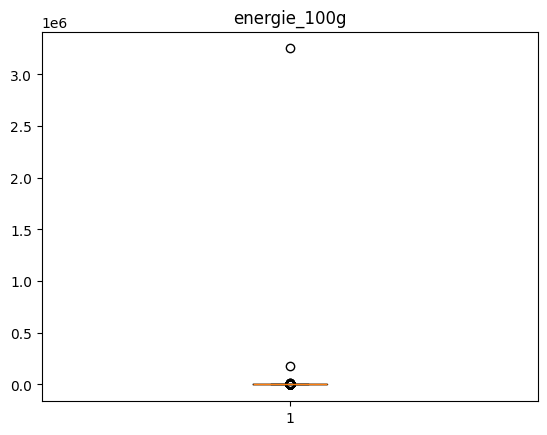

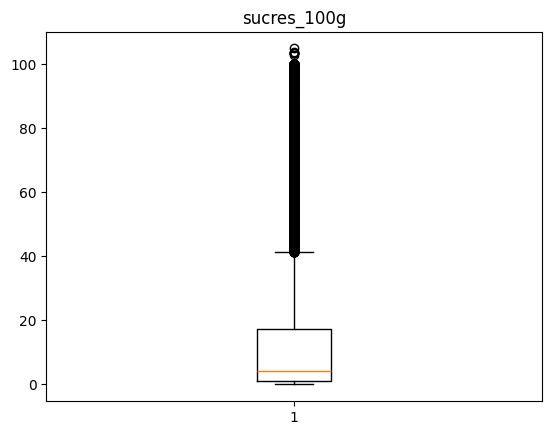

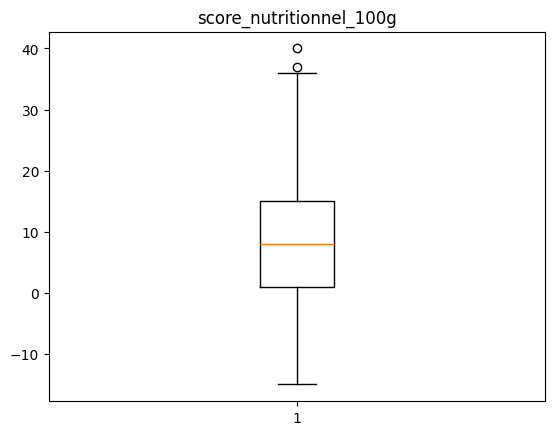

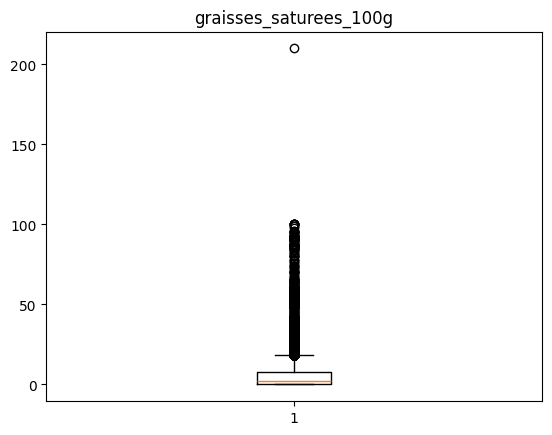

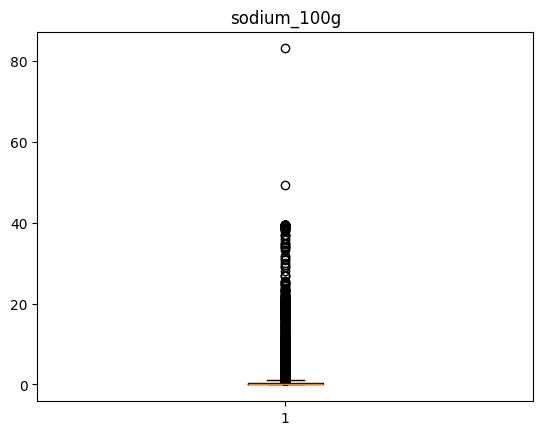

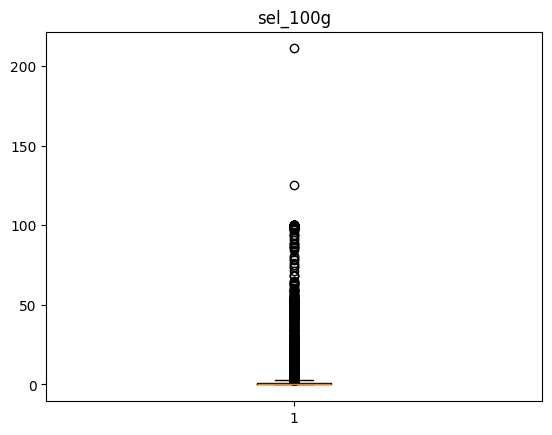

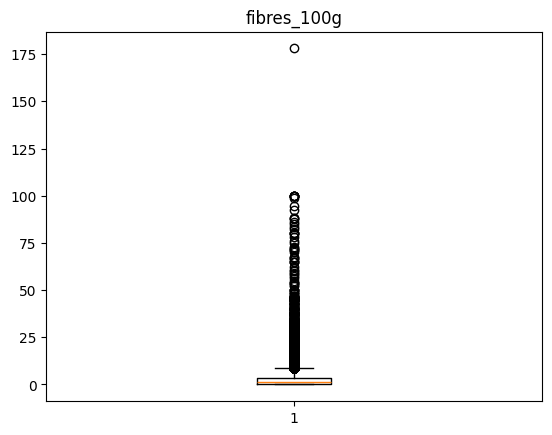

In [ ]:
# Sélectionner les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=["number"]).columns
print(colonnes_numeriques)
# Créer un box plot pour chaque colonne
for colonne in colonnes_numeriques:
    fig, ax = plt.subplots()
    # Ignorer les valeurs NaN pour la colonne
    ax.boxplot(df[colonne].dropna())
    # Définir le titre du graphique avec le nom de la colonne
    ax.set_title(colonne)
    plt.show()

In [ ]:
# Convertir les valeurs négatives en positives pour les colonnes spécifiées
colonnes_a_convertir = ['fibres_100g', 'sel_100g', 'sodium_100g', 'graisses_saturees_100g']
df[colonnes_a_convertir] = df[colonnes_a_convertir].abs()

# Vérifier que les valeurs négatives ont été converties
print(df[colonnes_a_convertir].describe())

        fibres_100g      sel_100g   sodium_100g  graisses_saturees_100g
count  48558.000000  68715.000000  68712.000000            68481.000000
mean       2.649445      1.147832      0.451921                5.460476
std        4.702878      4.357610      1.715579                8.600089
min        0.000000      0.000000      0.000000                0.000000
25%        0.000000      0.070000      0.027559                0.300000
50%        1.400000      0.510000      0.200787                1.900000
75%        3.400000      1.205500      0.474852                7.500000
max      178.000000    211.000000     83.000000              210.000000


In [ ]:
# Limiter les valeurs à un maximum de 100 dans les colonnes spécifiées
colonnes_a_verifier = ['fibres_100g', 'sel_100g', 'sodium_100g', 'graisses_saturees_100g']
df = df[(df[colonnes_a_verifier] <= 100).all(axis=1)]

# Vérifier les résultats
print(df[colonnes_a_verifier].describe())

        fibres_100g      sel_100g   sodium_100g  graisses_saturees_100g
count  47936.000000  47936.000000  47936.000000            47936.000000
mean       2.624377      1.119951      0.440927                4.867691
std        4.581200      4.413961      1.737798                8.172127
min        0.000000      0.000000      0.000000                0.000000
25%        0.000000      0.050800      0.020000                0.230000
50%        1.400000      0.500000      0.196850                1.500000
75%        3.400000      1.100000      0.433071                6.100000
max      100.000000    100.000000     39.370079              100.000000


In [ ]:
# Définir le seuil max en kilojoules (900 kcal)
seuil_max_kj = 900 * 4.184  # ≈ 3765.6 kJ

# Supprimer les lignes où energy_100g est < 0 ou > 3765.6 kJ
df = df[(df['energie_100g'] >= 0) & (df['energie_100g'] <= seuil_max_kj)]


Index(['energie_100g', 'sucres_100g', 'score_nutritionnel_100g',
       'graisses_saturees_100g', 'sodium_100g', 'sel_100g', 'fibres_100g'],
      dtype='object')


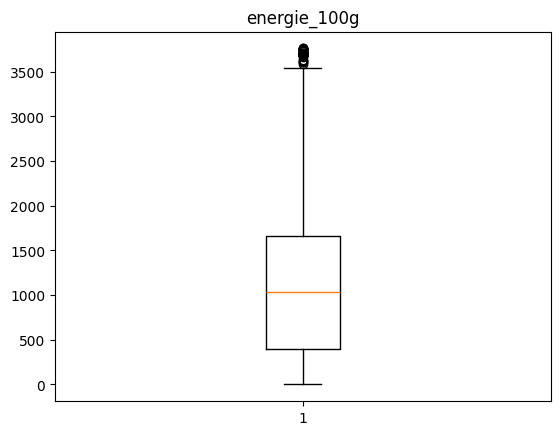

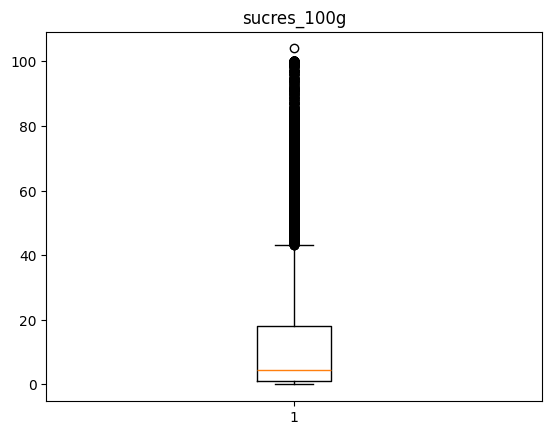

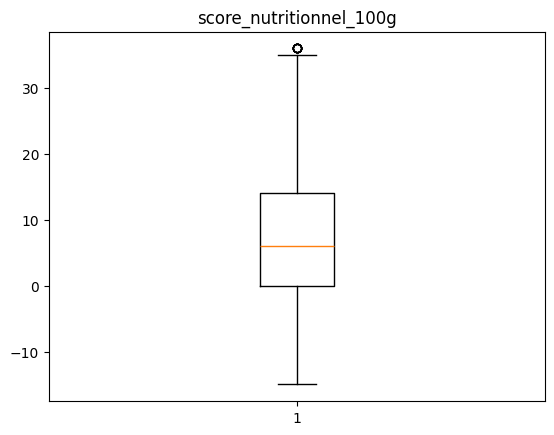

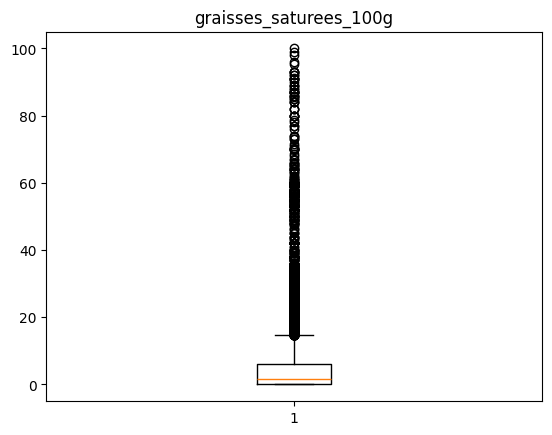

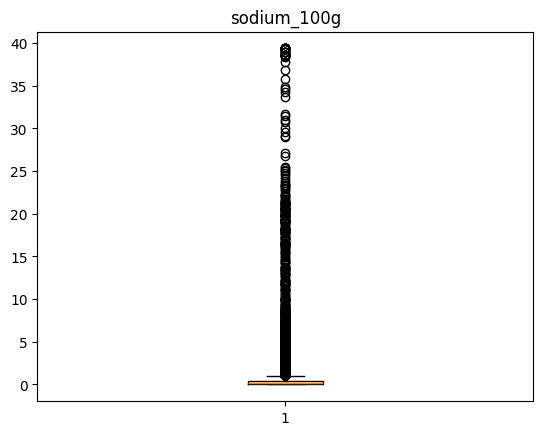

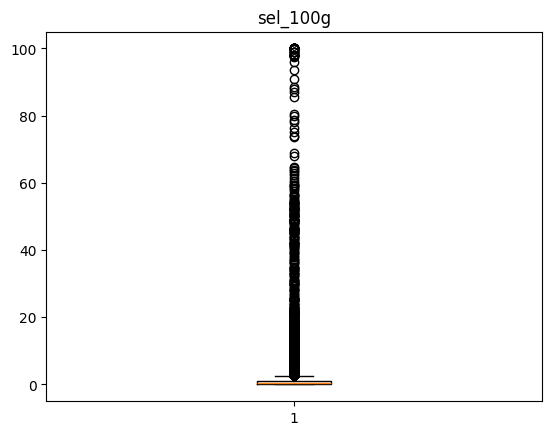

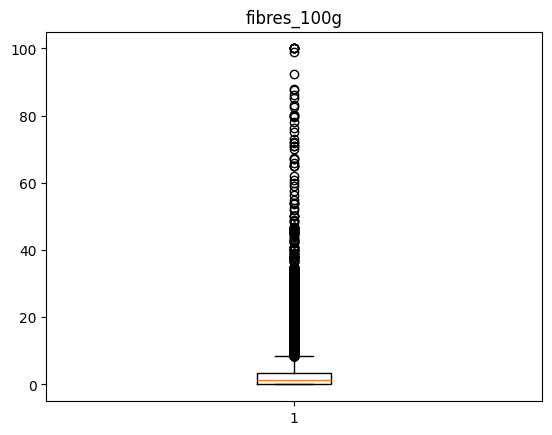

In [ ]:
# Sélectionner les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=["number"]).columns
print(colonnes_numeriques)
# Créer un box plot pour chaque colonne
for colonne in colonnes_numeriques:
    fig, ax = plt.subplots()
    # Ignorer les valeurs NaN pour la colonne
    ax.boxplot(df[colonne].dropna())
    # Définir le titre du graphique avec le nom de la colonne
    ax.set_title(colonne)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47699 entries, 106 to 320763
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     47699 non-null  object 
 1   nom_produit              47699 non-null  object 
 2   pays                     47699 non-null  object 
 3   note_nutritionnelle      47214 non-null  object 
 4   energie_100g             47699 non-null  float64
 5   sucres_100g              47598 non-null  float64
 6   score_nutritionnel_100g  47214 non-null  float64
 7   graisses_saturees_100g   47699 non-null  float64
 8   sodium_100g              47699 non-null  float64
 9   sel_100g                 47699 non-null  float64
 10  additifs                 29107 non-null  object 
 11  tags_additifs            17206 non-null  object 
 12  fibres_100g              47699 non-null  float64
 13  additifs_fr              17206 non-null  object 
dtypes: float64(7), object(7)

In [ ]:
df['fibres_100g'].unique()


array([2.500e+00, 9.000e-01, 3.900e+00, 0.000e+00, 1.400e+00, 1.500e+00,
       1.800e+00, 1.700e+00, 1.000e+00, 1.000e-01, 1.300e+00, 2.700e+00,
       2.900e+00, 3.300e+00, 1.100e+00, 1.000e+01, 1.900e+00, 3.000e+00,
       8.000e-01, 3.200e+00, 8.300e+00, 2.200e+00, 5.000e-01, 4.000e+00,
       6.000e-01, 2.100e+00, 4.700e+00, 2.300e+00, 5.700e+00, 1.200e+00,
       9.900e+00, 2.400e+00, 1.100e+01, 5.400e+00, 5.800e+00, 4.200e+00,
       3.600e+00, 6.500e+00, 4.600e+00, 4.760e+00, 5.600e+00, 7.000e-01,
       3.030e-01, 3.000e-01, 6.670e+00, 2.000e+00, 9.700e+00, 6.200e+00,
       1.800e+01, 1.920e+01, 2.820e+00, 2.330e+00, 3.100e+00, 3.700e+00,
       4.100e+00, 5.200e+00, 9.300e+00, 3.570e+00, 4.400e+00, 3.500e+00,
       1.000e-03, 3.400e+00, 1.070e+01, 6.400e+00, 5.450e+00, 8.000e+00,
       9.400e+00, 5.000e+00, 2.270e+00, 2.940e+00, 2.500e+01, 4.000e-01,
       3.800e+00, 6.250e+00, 1.200e+01, 1.030e+01, 9.000e+00, 2.600e+00,
       8.400e+00, 1.080e+01, 1.090e+01, 6.700e+00, 

In [ ]:
df['note_nutritionnelle'].unique()

array(['e', 'd', 'c', 'a', 'b', nan], dtype=object)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # 1. Séparer les données avec et sans valeurs manquantes
# df_train = df[df['fibres_100g'].notna()]
# df_missing = df[df['fibres_100g'].isna()]

# # 2. Sélectionner les colonnes pertinentes
# features = ['energie_100g', 'sucres_100g', 'graisses_saturees_100g', 'sodium_100g', 'sel_100g']
# X = df_train[features]
# y = df_train['fibres_100g']

# # 3. Normaliser les données
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 4. Diviser les données en ensembles d'entraînement et de validation
# X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # 5. Construire le modèle
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1)  # Sortie pour prédire une seule valeur
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # 6. Entraîner le modèle
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# # 7. Prédire les valeurs manquantes
# X_missing = scaler.transform(df_missing[features])
# df_missing['fibres_100g'] = model.predict(X_missing)

# # 8. Combiner les données
# df = pd.concat([df_train, df_missing]).sort_index()

# # Vérifier le résultat
# print(df['fibres_100g'].isna().sum())  # Devrait afficher 0

In [ ]:
df.shape

(47699, 14)

In [ ]:
df = df[(df['sucres_100g'] >= 0) & (df['sucres_100g'] <= 100)]

In [ ]:
df.shape

(47597, 14)

In [ ]:
df['score_nutritionnel_100g'].unique()

array([ 22.,  14.,  13.,  15.,  12.,   6.,  26.,  18.,  20.,  -2.,   1.,
        11.,  19.,   4.,   2.,   7.,   5.,  -4.,  25.,  nan,   0.,   3.,
        17.,  -3.,  16.,   9.,  24.,  21.,  23.,  -1.,  10.,  -5.,   8.,
        -6.,  29.,  35.,  27.,  28.,  -9.,  36.,  32.,  -7., -10.,  30.,
        -8.,  33., -11., -12., -13.,  34.,  31., -14., -15.])

In [ ]:
df['graisses_saturees_100g'].unique()

array([12.5 ,  0.8 ,  2.9 , ...,  1.95,  9.55, 99.  ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47597 entries, 106 to 320763
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     47597 non-null  object 
 1   nom_produit              47597 non-null  object 
 2   pays                     47597 non-null  object 
 3   note_nutritionnelle      47213 non-null  object 
 4   energie_100g             47597 non-null  float64
 5   sucres_100g              47597 non-null  float64
 6   score_nutritionnel_100g  47213 non-null  float64
 7   graisses_saturees_100g   47597 non-null  float64
 8   sodium_100g              47597 non-null  float64
 9   sel_100g                 47597 non-null  float64
 10  additifs                 29012 non-null  object 
 11  tags_additifs            17166 non-null  object 
 12  fibres_100g              47597 non-null  float64
 13  additifs_fr              17166 non-null  object 
dtypes: float64(7), object(7)

In [ ]:
df['sucres_100g'].describe()

count    47597.000000
mean        13.363631
std         18.522905
min          0.000000
25%          1.200000
50%          4.400000
75%         18.000000
max        100.000000
Name: sucres_100g, dtype: float64

In [ ]:
df['energie_100g'].describe()

count    47597.000000
mean      1103.286365
std        766.603021
min          0.000000
25%        398.000000
50%       1034.000000
75%       1661.000000
max       3761.000000
Name: energie_100g, dtype: float64

    2.3 Remplacement des NaN par la moyenne(mean)


In [ ]:
# Permet de supprimer les lignes contenant des produits contenant "protein" dans le nom et des pays contenant "Germany"
df = df[~((df['pays'].str.contains('Allemagne', case=False, na=False)) & (df['nom_produit'].str.contains('protein', case=False, na=False)))]


In [ ]:
df_germany = df[df['pays'].str.contains('Allemagne')]
df_germany = df_germany[['nom_produit', 'pays', 'note_nutritionnelle', 'energie_100g', 'sucres_100g', 'score_nutritionnel_100g', 'graisses_saturees_100g', 'sodium_100g', 'sel_100g', 'fibres_100g', 'additifs_fr']]

print(df_germany.head(10))

                                 nom_produit       pays note_nutritionnelle  \
20798    Fein gehackte Tomaten mit Basilikum  Allemagne                   a   
101005                             Zaru Soba  Allemagne                   b   
115236                               Lasagne  Allemagne                   a   
119356                  Orange Blossom Water  Allemagne                   b   
119357                            Rose Water  Allemagne                   b   
144897  Honey Mustard & Onion Pretzel Pieces  Allemagne                   e   
147018         wow!bab sizilianische Zitrone  Allemagne                   c   
174867        Pizza Prosciutto / Pizza Tonno  Allemagne                   c   
174982                    Zarte Haferflocken  Allemagne                   a   
175398                          Premium Cola  Allemagne                   e   

        energie_100g  sucres_100g  score_nutritionnel_100g  \
20798           88.0         3.40                     -6.0   
101005

In [ ]:
df.loc[df['code'] == 39529, 'nutrition_grade_fr'] = 'd'




In [ ]:
# Remplacer les NaN dans la colonne 'nutrition-score-fr_100g' par 14
df['score_nutritionnel_100g'] = df['score_nutritionnel_100g'].fillna(14)

# Vérifier le résultat
df['score_nutritionnel_100g'].isna().sum()  # Devrait afficher 0

np.int64(0)

In [ ]:
# Supprimer les lignes où 'nutrition_grade_fr' est NaN
df = df.dropna(subset=['note_nutritionnelle'])

# Vérifier que les NaN ont été supprimés
print(df['note_nutritionnelle'].isna().sum())  # Devrait afficher 0

0


In [ ]:
df['score_nutritionnel_100g'].describe()

count    47189.000000
mean         7.391214
std          9.046341
min        -15.000000
25%          0.000000
50%          6.000000
75%         14.000000
max         36.000000
Name: score_nutritionnel_100g, dtype: float64

In [ ]:
df = df[df['note_nutritionnelle'].notna() & (df['note_nutritionnelle'].str.strip() != "")]


In [ ]:
df.head(60)

,code,nom_produit,pays,note_nutritionnelle,energie_100g,sucres_100g,score_nutritionnel_100g,graisses_saturees_100g,sodium_100g,sel_100g,additifs,tags_additifs,fibres_100g,additifs_fr,nutrition_grade_fr
106,36252,Lion Peanut x2,France,e,1883.0,57.5,22.0,12.5,0.038000,0.09652,[ milk-chocolate-coating -> en:milk-chocolate...,en:e322,2.5,E322 - Lécithines,NaN
190,10187319,Mini Confettis,France,d,1753.0,87.7,14.0,0.8,0.003937,0.01000,NaN,NaN,0.9,NaN,NaN
191,10207260,Praliné Amande Et Noisette,France,d,2406.0,50.3,14.0,2.9,0.001181,0.00300,NaN,NaN,3.9,NaN,NaN
226,40608754,"Pepsi, Nouveau goût !",France,e,177.0,10.4,13.0,0.0,0.010000,0.02540,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e150d,en:e338",0.0,"E150d - Caramel au sulfite d'ammonium,E338 - A...",NaN
234,69161025,Tarte Poireaux Et Lardons,France,d,1079.0,1.0,15.0,11.0,0.314961,0.80000,NaN,NaN,1.4,NaN,NaN
242,10,Madeleines nature,France,d,1900.0,26.0,12.0,2.5,0.259843,0.66000,[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e422,en:e503,en:e500,en:e450,en:e471",1.5,"E422 - Glycérol,E503 - Carbonates d'ammonium,E...",NaN
279,30,Cakes Raisins,France,d,1768.0,28.0,13.0,2.5,0.255906,0.65000,[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e422,en:e503,en:e500,en:e450,en:e471",1.8,"E422 - Glycérol,E503 - Carbonates d'ammonium,E...",NaN
283,31,Cakes aux Fruits,France,d,1670.0,34.0,12.0,2.0,0.236220,0.60000,[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",1.5,"E202 - Sorbate de potassium,E220 - Anhydride s...",NaN
299,50,Financiers aux Amandes,France,e,1868.0,39.0,22.0,10.0,0.216535,0.55000,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,"en:e422,en:e500,en:e450",1.7,"E422 - Glycérol,E500 - Carbonates de sodium,E4...",NaN
301,51,Fondants Citron,France,e,1896.0,37.0,22.0,10.0,0.307087,0.78000,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,"en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...",2.5,"E401 - Alginate de sodium,E330 - Acide citriqu...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47189 entries, 106 to 320763
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     47189 non-null  object 
 1   nom_produit              47189 non-null  object 
 2   pays                     47189 non-null  object 
 3   note_nutritionnelle      47189 non-null  object 
 4   energie_100g             47189 non-null  float64
 5   sucres_100g              47189 non-null  float64
 6   score_nutritionnel_100g  47189 non-null  float64
 7   graisses_saturees_100g   47189 non-null  float64
 8   sodium_100g              47189 non-null  float64
 9   sel_100g                 47189 non-null  float64
 10  additifs                 28635 non-null  object 
 11  tags_additifs            16889 non-null  object 
 12  fibres_100g              47189 non-null  float64
 13  additifs_fr              16889 non-null  object 
 14  nutrition_grade_fr      

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                         energie_100g  sucres_100g  score_nutritionnel_100g  \
energie_100g                 1.000000     0.343201                 0.609259   
sucres_100g                  0.343201     1.000000                 0.487807   
score_nutritionnel_100g      0.609259     0.487807                 1.000000   
graisses_saturees_100g       0.554764     0.128580                 0.615938   
sodium_100g                 -0.020470    -0.072582                 0.125407   
sel_100g                    -0.020472    -0.072585                 0.125406   
fibres_100g                  0.224203     0.033685                -0.124610   

                         graisses_saturees_100g  sodium_100g  sel_100g  \
energie_100g                           0.554764    -0.020470 -0.020472   
sucres_100g                            0.128580    -0.072582 -0.072585   
score_nutritionnel_100g                0.615938     0.125407  0.125406   
graisses_saturees_100g                 1.000000     0.015416  0.015415 

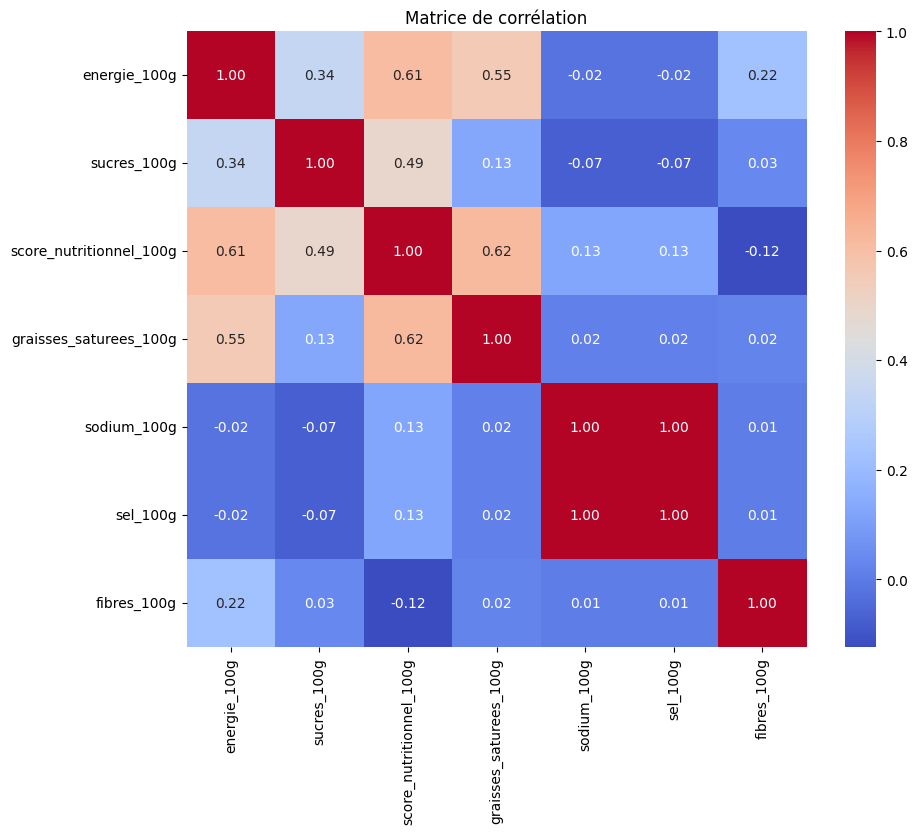

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
df.shape

(47189, 15)

3. Sauvegarde le DataFrame 

In [ ]:
#df.to_csv("./data/data_openfoodfact_products.csv")